In [1]:
import os
import sys
import warnings

sys.path.append(os.path.dirname(os.getcwd()))
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

import geomstats.backend as gs
import geomstats.visualization as vs

from geomstats.geometry.hypersphere import Hypersphere
from geomstats.learning.frechet_mean import FrechetMean
from geomstats.learning.pca import TangentPCA

INFO: Using numpy backend


In [13]:
data = pd.read_excel("Itr_6.xlsx")
Data = data.iloc[:,1:97].T
Data_normalized = pd.DataFrame()
for i in range(len(Data.columns)):
    spectra_normalized = Data.iloc[i:i+1,:]/np.linalg.norm(Data.iloc[i:i+1,:])
    Data_normalized = Data_normalized.append(spectra_normalized)

In [3]:
sphere = Hypersphere(dim=101)
mean = FrechetMean(metric=sphere.metric)
mean.fit(Data_normalized)

mean_estimate = mean.estimate_

In [4]:
tpca = TangentPCA(metric=sphere.metric, n_components=4)
tpca = tpca.fit(Data_normalized, base_point=mean_estimate)
tangent_projected_data = tpca.transform(Data_normalized)

In [5]:
geodesic_0 = sphere.metric.geodesic(
        initial_point=mean_estimate,
        initial_tangent_vec=tpca.components_[0])
geodesic_1 = sphere.metric.geodesic(
        initial_point=mean_estimate,
        initial_tangent_vec=tpca.components_[1])
geodesic_2 = sphere.metric.geodesic(
        initial_point=mean_estimate,
        initial_tangent_vec=tpca.components_[2])
geodesic_3 = sphere.metric.geodesic(
        initial_point=mean_estimate,
        initial_tangent_vec=tpca.components_[3])

n_steps = 100
t = gs.linspace(-1., 1., n_steps)
geodesic_points_0 = geodesic_0(t)
geodesic_points_1 = geodesic_1(t) 
geodesic_points_2 = geodesic_1(t) 
geodesic_points_3 = geodesic_1(t) 

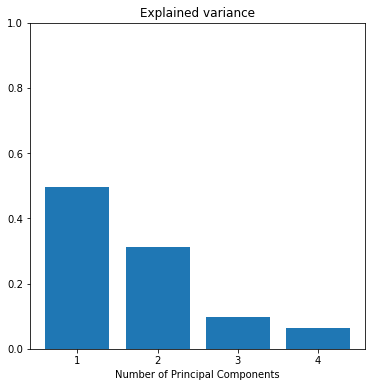

In [6]:
fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111)
xticks = gs.arange(1, 4+1, 1)
ax.xaxis.set_ticks(xticks)
ax.set_title('Explained variance')
ax.set_xlabel('Number of Principal Components')
ax.set_ylim((0, 1))
ax.bar(xticks, tpca.explained_variance_ratio_);

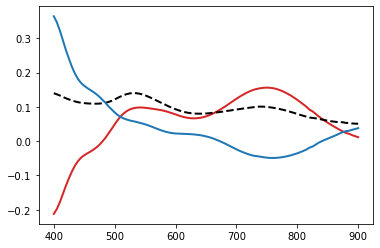

In [7]:
#PC1
x = data.iloc[:,0]
y1 = tpca.inverse_transform(np.array([-1,0,0,0]))
y2 = mean_estimate
y3 = tpca.inverse_transform(np.array([1,0,0,0]))

plt.plot(x, y1, color='tab:red', lw=2.0) # mean - std 
plt.plot(x, y2, color='k', ls='--', lw=2.0) # mean
plt.plot(x, y3, color='tab:blue', lw=2.0) # mean + std
plt.show()

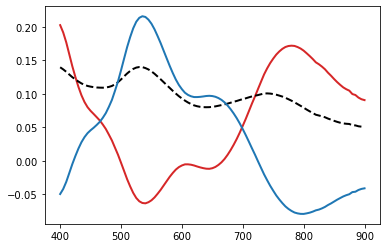

In [8]:
#PC2
x = data.iloc[:,0]
y1 = tpca.inverse_transform(np.array([0,-1,0,0]))
y2 = mean_estimate
y3 = tpca.inverse_transform(np.array([0,1,0,0]))

plt.plot(x, y1, color='tab:red', lw=2.0) # mean - std 
plt.plot(x, y2, color='k', ls='--', lw=2.0) # mean
plt.plot(x, y3, color='tab:blue', lw=2.0) # mean + std
plt.show()

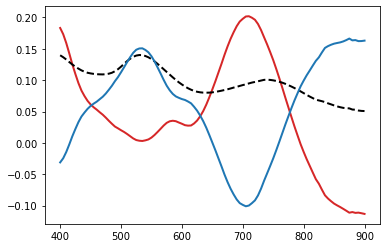

In [9]:
#PC3
x = data.iloc[:,0]
y1 = tpca.inverse_transform(np.array([0,0,-1,0]))
y2 = mean_estimate
y3 = tpca.inverse_transform(np.array([0,0,1,0]))

plt.plot(x, y1, color='tab:red', lw=2.0) # mean - std 
plt.plot(x, y2, color='k', ls='--', lw=2.0) # mean
plt.plot(x, y3, color='tab:blue', lw=2.0) # mean + std
plt.show()

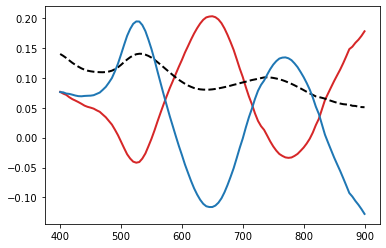

In [10]:
#PC4
x = data.iloc[:,0]
y1 = tpca.inverse_transform(np.array([0,0,0,-1]))
y2 = mean_estimate
y3 = tpca.inverse_transform(np.array([0,0,0,1]))

plt.plot(x, y1, color='tab:red', lw=2.0) # mean - std 
plt.plot(x, y2, color='k', ls='--', lw=2.0) # mean
plt.plot(x, y3, color='tab:blue', lw=2.0) # mean + std
plt.show()